In [1]:
import warnings
warnings.filterwarnings("ignore")
from custom_libs import db
from custom_libs import preprocessing
from custom_libs import classification
from custom_libs import plotting
from custom_libs import best_restaurants
from custom_libs import dump

In [3]:
text_column_name = 'review'
cleaned_text_column_name = 'review_cleaned'

In [4]:
df = db.get_dataset("McDonald_s_Reviews")
preprocessing.add_id_column(df, columns=["latitude", "longitude"])
preprocessing.add_rating_number_column(df)
preprocessing.preprocess_df(df, text_column_name, cleaned_text_column_name)
df.head(2)

Number of unique ids:  39


reviewer_id  store_name              category  \
0            1  McDonald's  Fast food restaurant   
1            2  McDonald's  Fast food restaurant   

                                       store_address   latitude  longitude  \
0  13749 US-183 Hwy, Austin, TX 78750, United States  30.460718 -97.792874   
1  13749 US-183 Hwy, Austin, TX 78750, United States  30.460718 -97.792874   

  rating_count   review_time  \
0        1,240  3 months ago   
1        1,240    5 days ago   

                                              review   rating  rating_number  \
0  Why does it look like someone spit on my food?...   1 star              1   
1  It'd McDonalds. It is what it is as far as the...  4 stars              4   

    id                                     review_cleaned  
0  9.0  look like someone spit food normal transaction...  
1  9.0  far food atmosphere go staff make difference f...

In [5]:
sentiment_our_column_name = 'sentiment_our'
sentiment_auto_column_name = 'sentiment_auto'

In [6]:
# Our model
model = dump.load_model("our_model")
vectorizer = dump.load_model("our_vectorizer")
df[sentiment_our_column_name] = model.predict(vectorizer.transform(df[cleaned_text_column_name]))

# SentimentIntensityAnalyzer model
classification.append_sentiment_for_each_row(df, cleaned_text_column_name, new_column_name=sentiment_auto_column_name)

# Results
df[[cleaned_text_column_name, sentiment_auto_column_name, sentiment_our_column_name]]

Loading model from: dump_models/our_model.pkl
Loading model from: dump_models/our_vectorizer.pkl


review_cleaned sentiment_auto  \
0      look like someone spit food normal transaction...       Positive   
1      far food atmosphere go staff make difference f...       Positive   
2      make mobile get speaker checked line move leav...       Negative   
3       crispy chicken sandwich customer service quick p        Neutral   
4      repeat time drive thru still manage mess suppo...       Negative   
...                                                  ...            ...   
33391                                        treat badly       Negative   
33392                                       service good       Positive   
33393                               remove hunger enough       Negative   
33394                       good lately become expensive       Positive   
33395                                     take good care       Positive   

      sentiment_our  
0           Neutral  
1          Positive  
2          Negative  
3          Positive  
4           Neutral  
...             ...  
33391       Neutral  
33392       Neutral  
33393       Neutral  
33394       Neutral  
33395       Neutral  

[33396 rows x 3 columns]

In [7]:
# Rows with different sentiment
df_differences = df[df[sentiment_our_column_name] != df[sentiment_auto_column_name]]
df_differences.shape

(14654, 15)

In [8]:
df_differences = df_differences[[text_column_name, sentiment_auto_column_name, sentiment_our_column_name]]
df_differences.sample(20)

review sentiment_auto  \
11105                    Good shakes :)\nLot's of cream.       Positive   
19367  McDonald's. Ordered twice and twice my order w...       Negative   
1860   I did the Drive though the food was warm and i...       Positive   
16448  Hey what can I say? But!!!!! Sure make not jus...       Positive   
15692  Never get anything right. I generally go to a ...       Positive   
32513  WISH I CAN RATE THIS 0. I JUST PAID $40 ON UBE...       Positive   
11127  This place is the worst!  I came down on a 3 d...       Negative   
17307  Hi,\n\nI have just purchased medium fries and ...       Positive   
32859                 Always good for a late night snack       Positive   
16567  I don't really eat food at Mcdonalds but I sto...       Negative   
31251  I ordered a 6 piece nuggets and 3 chocolate ch...        Neutral   
720                                                Good        Positive   
1717                                               Good        Positive   
12785  Lady at the drive thru made a mistake and we t...       Negative   
31361  Clean fast accurate and most importantly frien...       Positive   
8729                          Dining room closes at 8pm.        Neutral   
15545  The food is alright but the donï¿½ï¿½ï¿½ï¿½ï¿½...       Positive   
25686  Food was terrible. My friend and I both threw ...        Neutral   
11454  Staff is friendly but they almost always get s...        Neutral   
26998       This is a good one.  Clean and easy to park.       Positive   

      sentiment_our  
11105       Neutral  
19367       Neutral  
1860        Neutral  
16448       Neutral  
15692       Neutral  
32513       Neutral  
11127      Positive  
17307       Neutral  
32859       Neutral  
16567       Neutral  
31251      Positive  
720         Neutral  
1717        Neutral  
12785       Neutral  
31361       Neutral  
8729       Negative  
15545       Neutral  
25686      Negative  
11454      Positive  
26998       Neutral

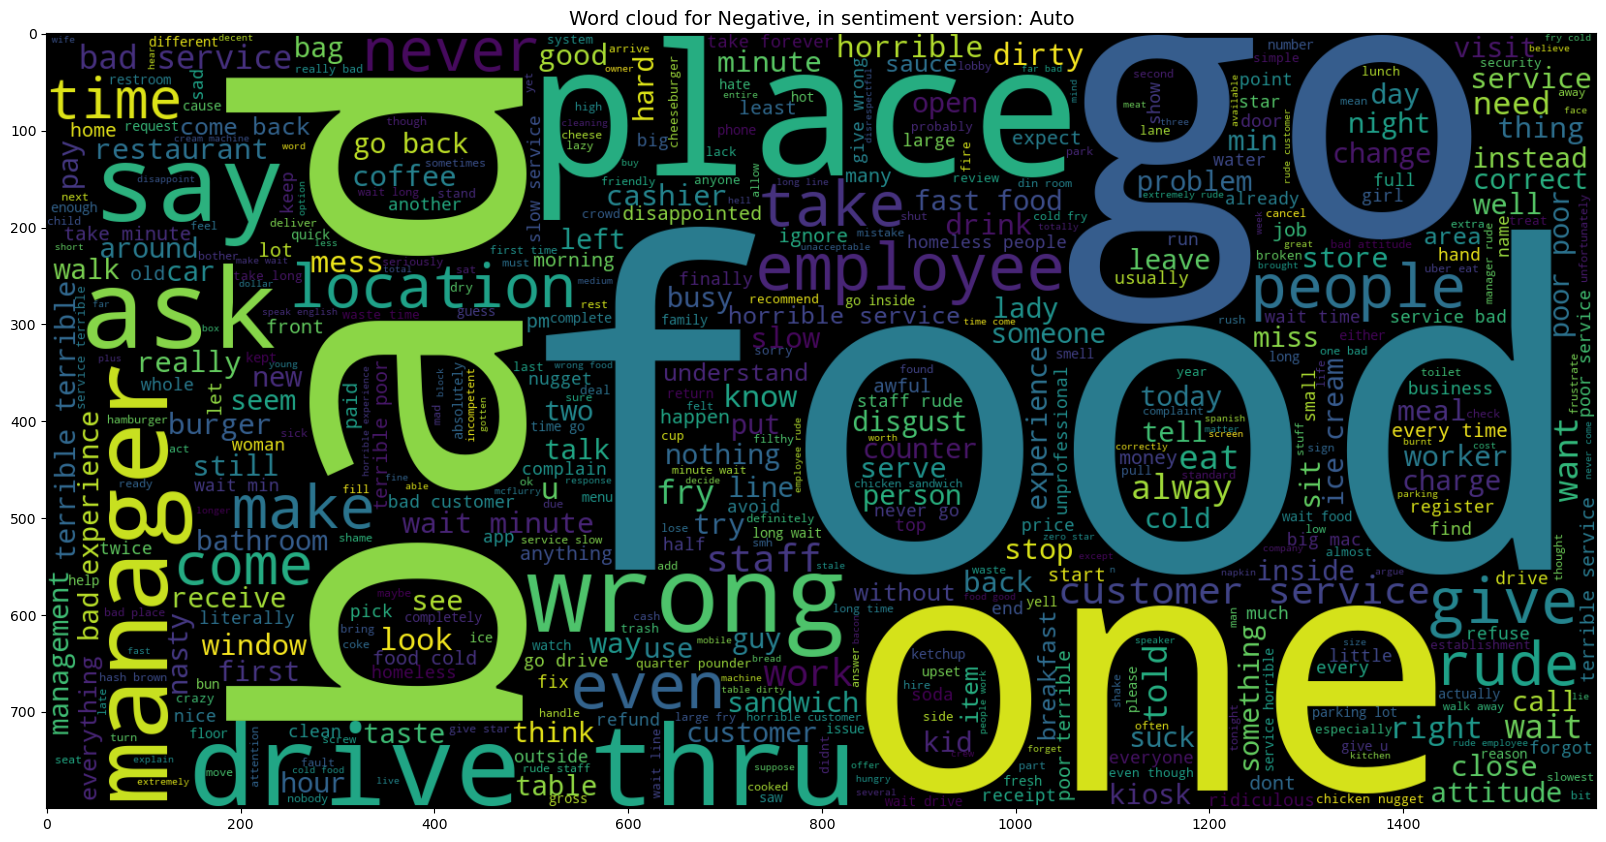

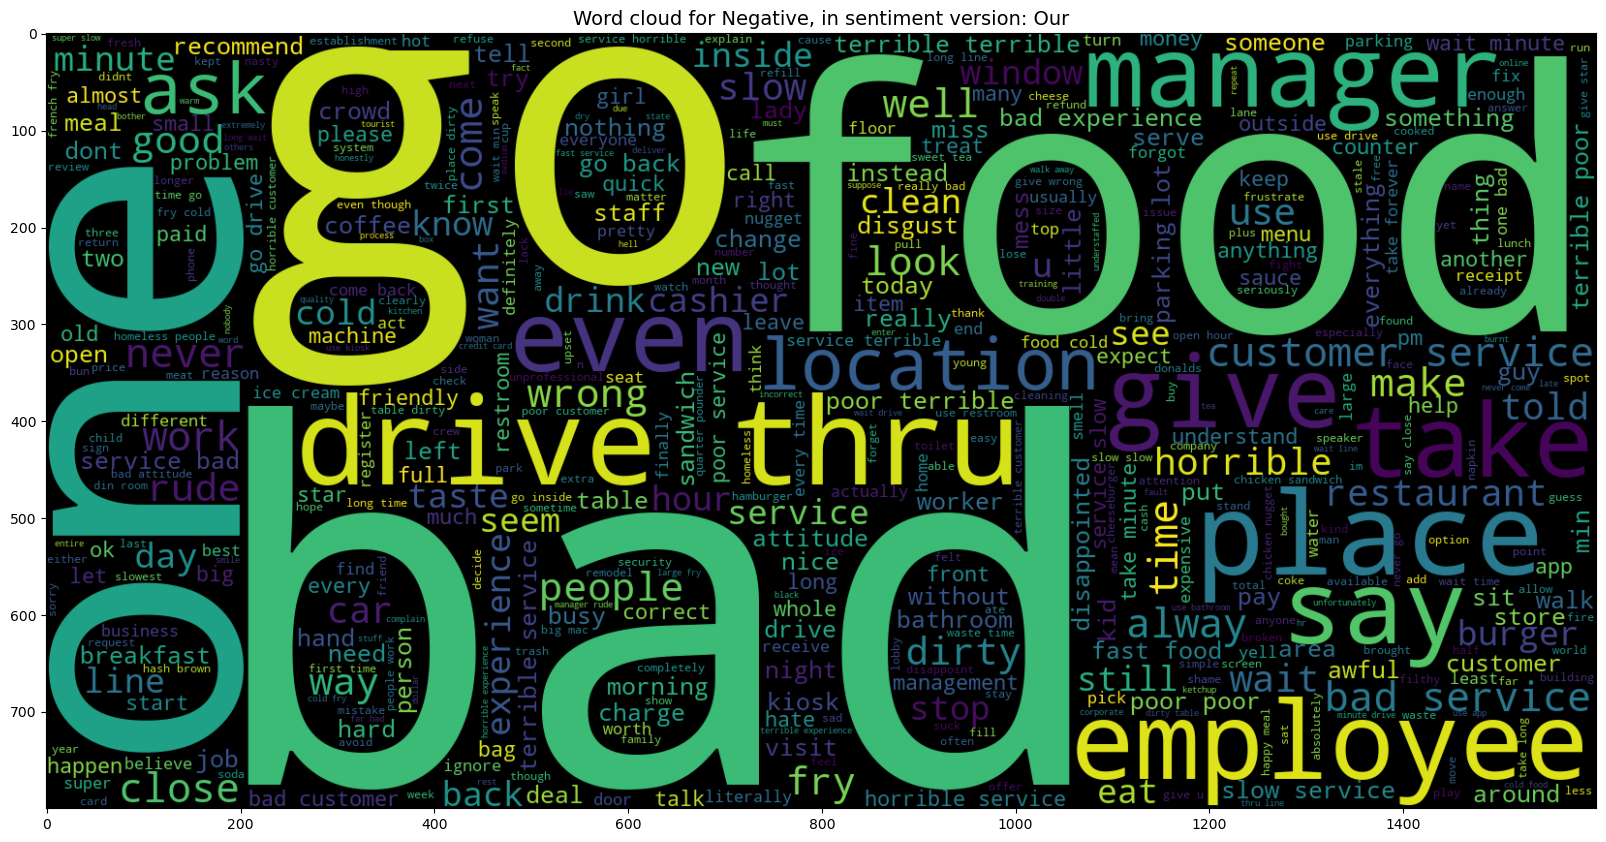

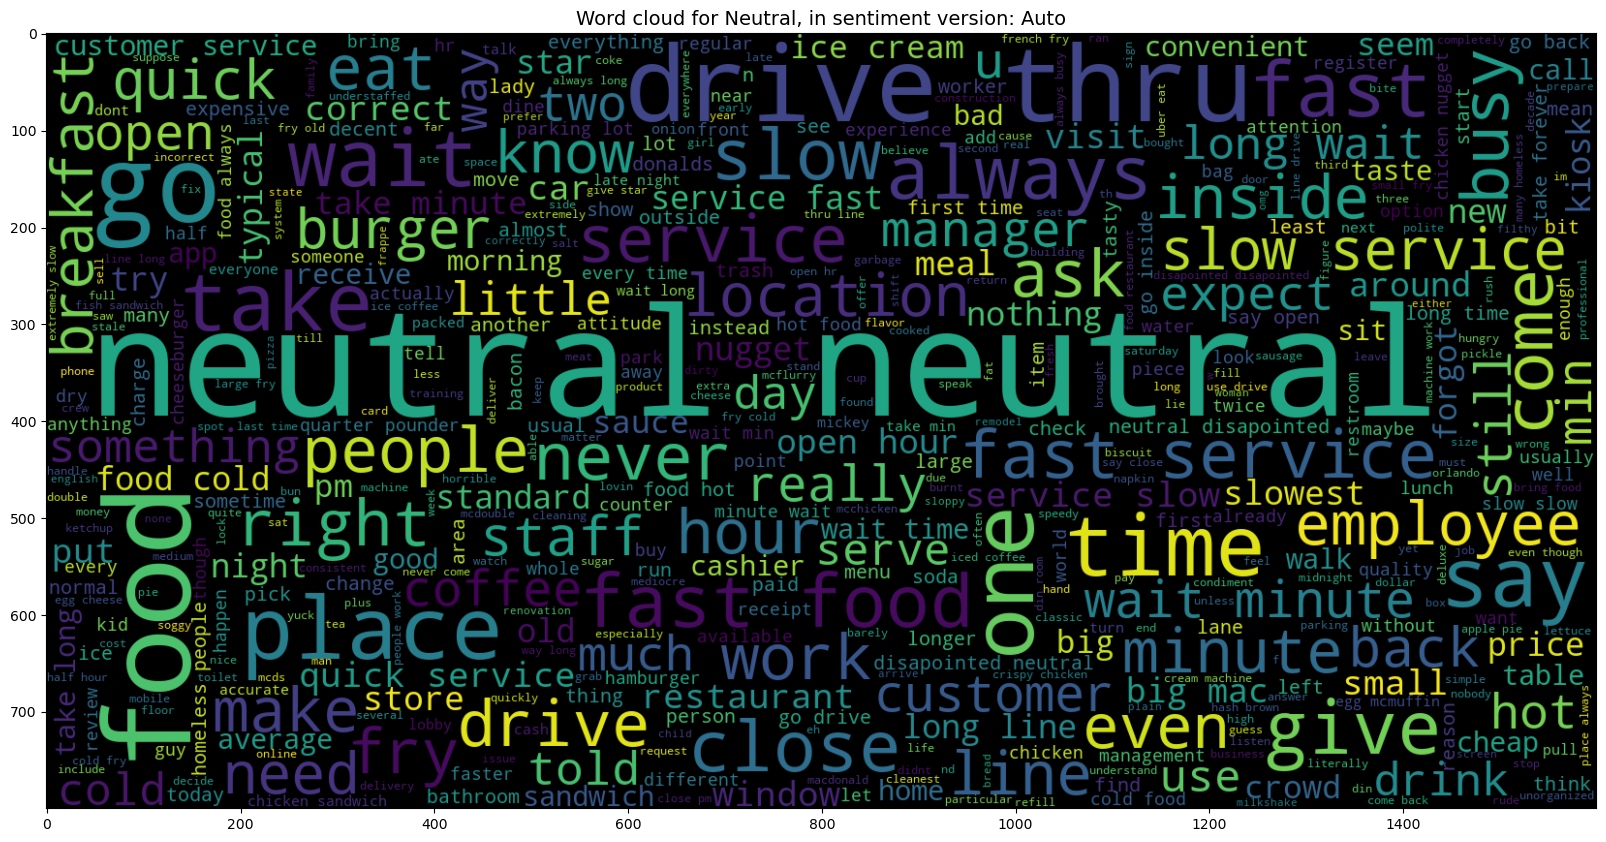

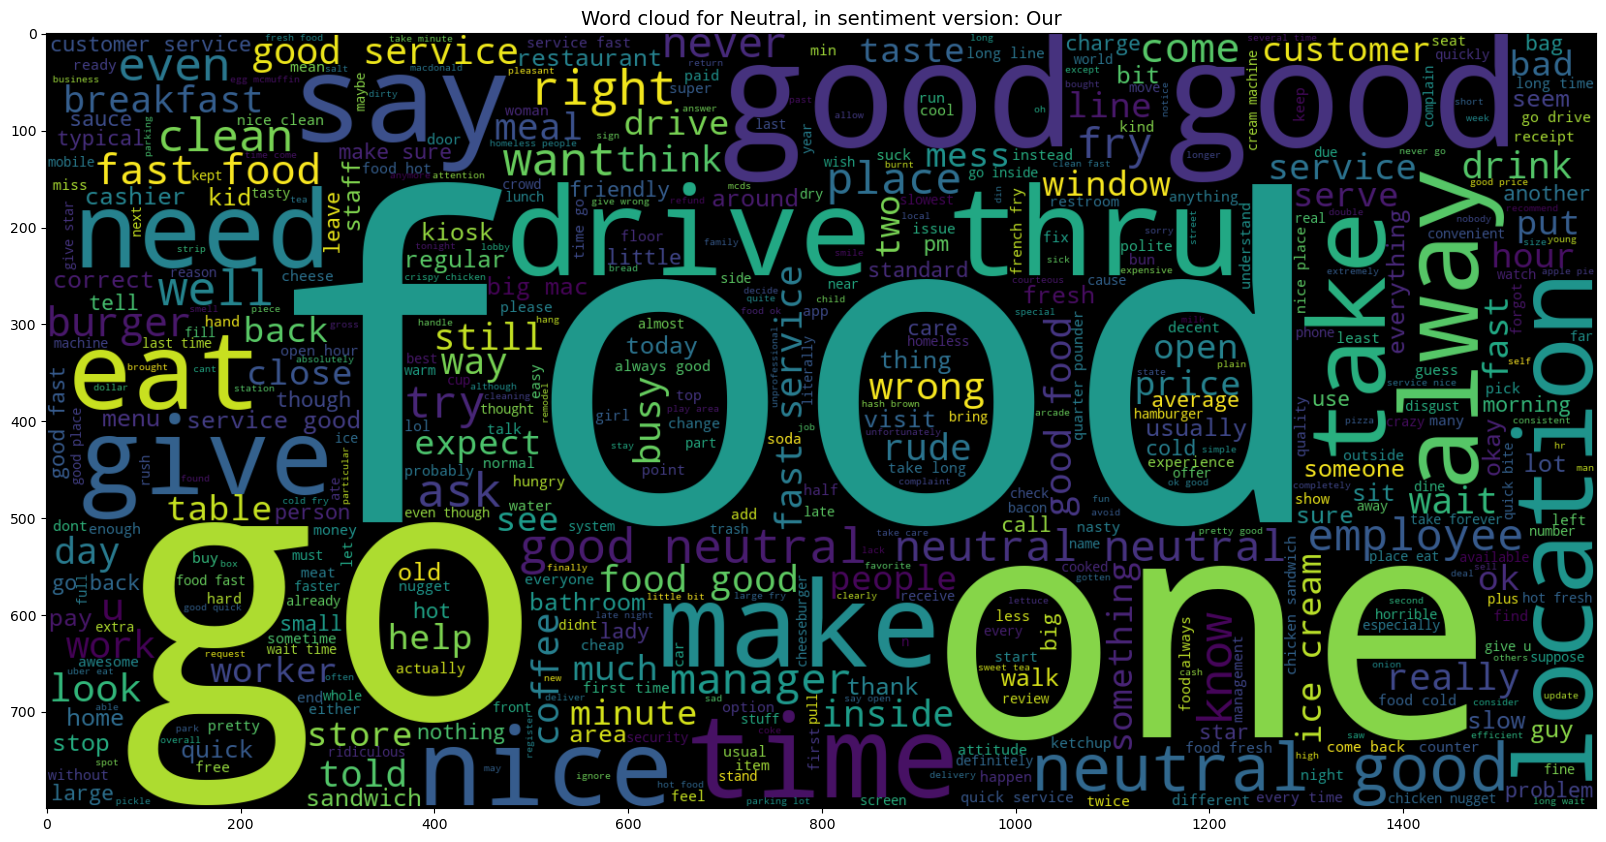

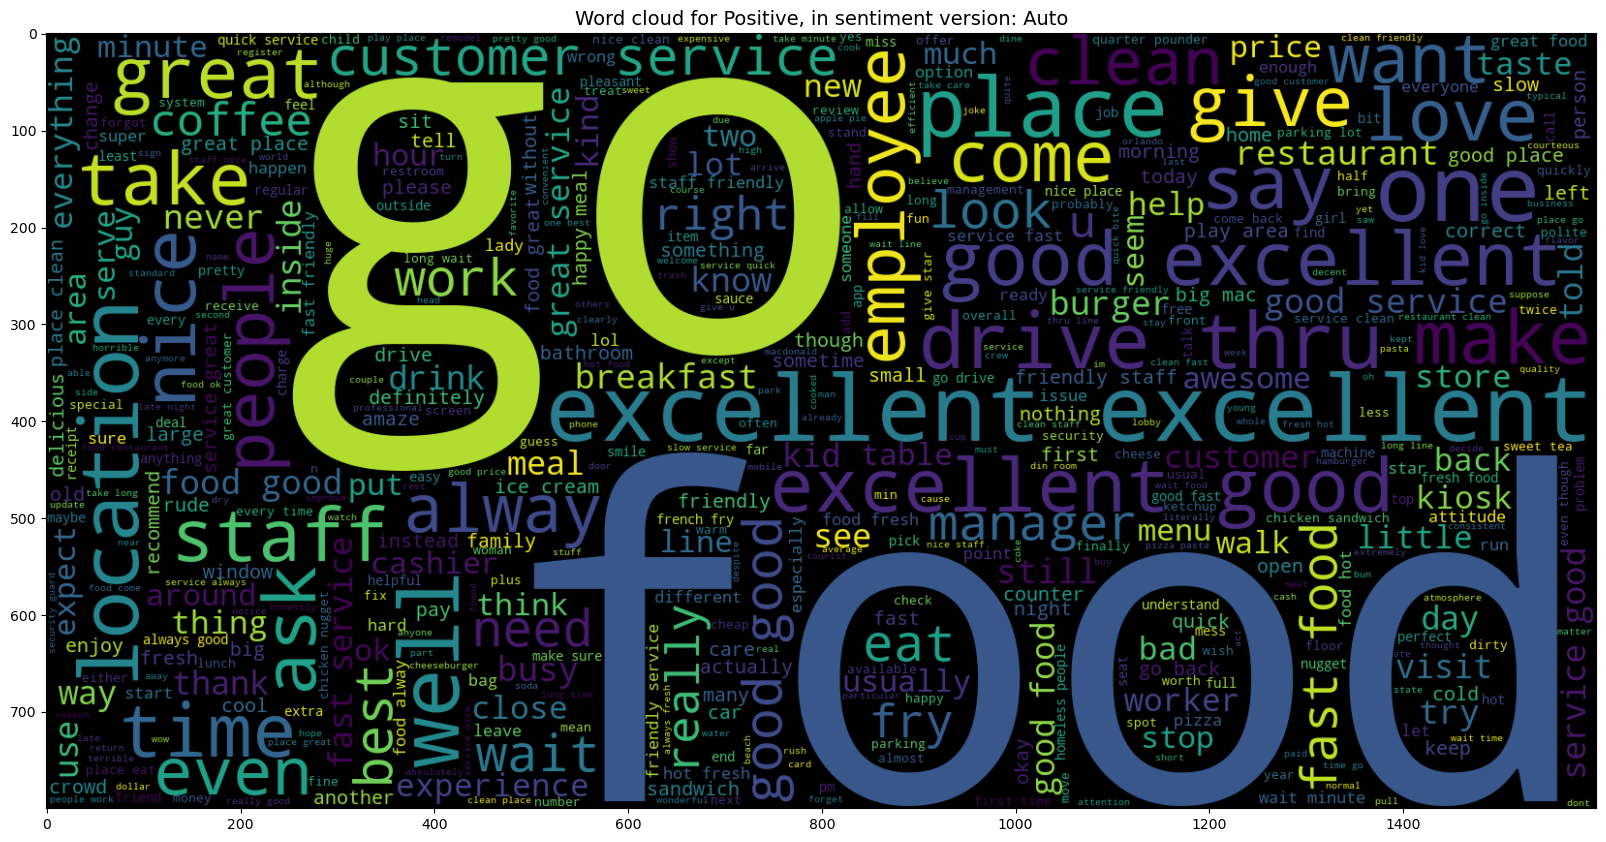

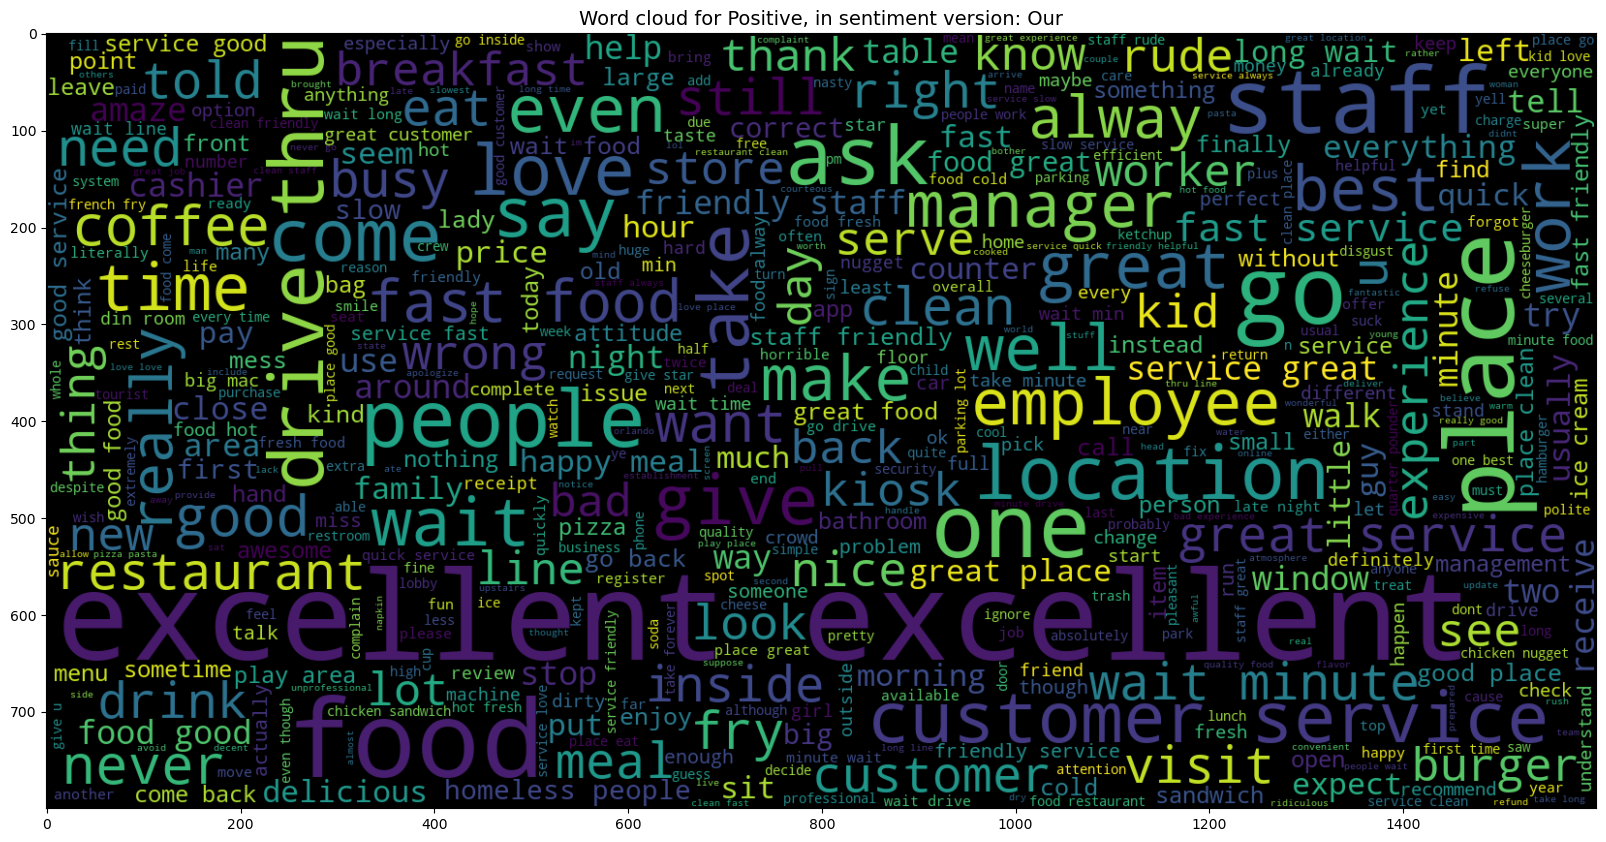

In [9]:
def plot_sentiment_word_clouds(df):
    for sentiment in classification.Sentiment.get_all():
        df_sentiment = df[(df[sentiment_auto_column_name]==sentiment)]
        plotting.plot_word_cloud(df_sentiment, sentiment, cleaned_text_column_name, plt_name="Auto")
        df_sentiment = df[(df[sentiment_our_column_name]==sentiment)]
        plotting.plot_word_cloud(df_sentiment, sentiment, cleaned_text_column_name, plt_name="Our")

plot_sentiment_word_clouds(df)

In [10]:
current_position = [30.460718, -97.792874]
max_distance = 20
best_rated_restaurant = best_restaurants.select_best_restaurant_from_stars(df, current_position, max_distance)
best_rated_restaurant

store_address   latitude  longitude
id                                                                     
8.0  8500 US-290, Austin, TX 78724, United States  30.329135 -97.660629

In [11]:
best_clf_column = sentiment_auto_column_name
best_feeling_restaurant = best_restaurants.select_best_restaurant_from_sentiment(df, current_position, max_distance, sentiment_column=best_clf_column)
best_feeling_restaurant

store_address   latitude  longitude
id                                                                          
9.0  13749 US-183 Hwy, Austin, TX 78750, United States  30.460718 -97.792874